# Proyect 1: Population synthesis
Juan Pablo Castro

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10000# number of objects 
t_cluster = 10 #cluster age in giga-years


# Contants
M_sun = 2e30
R_sun = 6.969e8 #metros
L_sun = 3.827e26 # Watts


### Initial Mass function: 

#### Salpeter55

##### Inversion technique(Salpeter55)



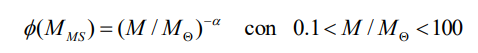

$ p(x) = p(y)\frac{dy}{dx} -->  X = \int \phi_{MS} = \int (M/M_{sun})^{-\alpha} = \frac{(M/M_{sun})^{1-\alpha}}
{1 -\alpha} $

$M/M_{sun}  = (X(1-\alpha))^{\frac{1}{1-\alpha}}$

To find the limits for the random-uniform distribution we input the solar-mass physical limits in the integrated formula

$X = \frac{(M/M_{sun} = 0.1,100)^{1-\alpha}}{1 -\alpha}$

In [18]:
"""
alpha = 2.35
maxM = 100 # masas solares
minM = 0.1 #masas solares

p = np.linspace(0.1,50,1000)
def massDstr(mass):
    return (mass**(1-alpha) / (1-alpha))

print(massDstr(0.1),massDstr(100))

X = ((massDstr(maxM) - massDstr(minM))*np.random.rand(N) + massDstr(minM))
alpha = 2.35

M_ms = (X*(1-alpha))**(1/(1-alpha))

plt.plot(p, p**(-2.35))
plt.hist(M_ms, bins=100)
"""

'\nalpha = 2.35\nmaxM = 100 # masas solares\nminM = 0.1 #masas solares\n\np = np.linspace(0.1,50,1000)\ndef massDstr(mass):\n    return (mass**(1-alpha) / (1-alpha))\n\nprint(massDstr(0.1),massDstr(100))\n\nX = ((massDstr(maxM) - massDstr(minM))*np.random.rand(N) + massDstr(minM))\nalpha = 2.35\n\nM_ms = (X*(1-alpha))**(1/(1-alpha))\n\nplt.plot(p, p**(-2.35))\nplt.hist(M_ms, bins=100)\n'

##### Accept-rejection method(Salpeter55)

In [19]:
"""
#actividad en clase
maxM = 100 # masas solares
minM = 0.1 #masas solares
alpha = 2.35

def mass_function(mass):
    return mass**(-alpha)


X = (maxM-minM)*np.random.rand(N)+ minM
y1 = mass_function(minM)
y2 = mass_function(maxM)

y_l = []
L_ms_l = []
for i in range(len(X)):
    y = (y1 - y2)*np.random.rand() + y2
    if mass_function(X[i])> y:
        L_ms_l.append(X[i])
        y_l.append(y)
    else: None

M_ms = np.array(L_ms_l)
print(L_ms_l)
plt.scatter(L_ms_l, y_l)
"""



'\n#actividad en clase\nmaxM = 100 # masas solares\nminM = 0.1 #masas solares\nalpha = 2.35\n\ndef mass_function(mass):\n    return mass**(-alpha)\n\n\nX = (maxM-minM)*np.random.rand(N)+ minM\ny1 = mass_function(minM)\ny2 = mass_function(maxM)\n\ny_l = []\nL_ms_l = []\nfor i in range(len(X)):\n    y = (y1 - y2)*np.random.rand() + y2\n    if mass_function(X[i])> y:\n        L_ms_l.append(X[i])\n        y_l.append(y)\n    else: None\n\nM_ms = np.array(L_ms_l)\nprint(L_ms_l)\nplt.scatter(L_ms_l, y_l)\n'

#### Scalo 1998

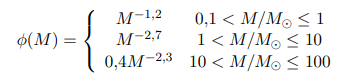

The ingration process is the same that above, as a result:

$M/M_{sun}  =  (X(1-\alpha)/b)^{\frac{1}{1-\alpha}}$

But again, to find the limits for the uniform distribution we use:

$X = b\frac{(M/M_{sun} = 0.1,100)^{1-\alpha}}{1 -\alpha}$


In [20]:

def massDstrG(X,a,b):
    return (X*(1-a)/b)**(1/(1-a))

def InverMassDstrG(mass,a,b):
    return b*mass**(1-a) / (1-a)

alpha = 2.35
maxM = 100 # maximun mass of our stars
minM = 0.1 # minimun mass of our stars

X = ((InverMassDstrG(maxM, 2.3, 0.4) - InverMassDstrG(minM, 1.2, 1))*np.random.rand(N) + InverMassDstrG(minM,1.2, 1))

M_ms_l =[]
for random in X:
    if massDstrG(random,1.2,1) <= 1:
        M_ms_l.append(massDstrG(random, 1.2, 1))
    elif massDstrG(random,2.7,1) <= 10:
        M_ms_l.append(massDstrG(random, 2.7, 1))
    else:
        M_ms_l.append(massDstrG(random, 2.3, 0.4))


M_ms = np.array(M_ms_l)



### Main sequence life-time

In [21]:
# Main sequence life-time, tMS, given by Iben & Laughlin (1989):
t_ms = 10*(M_ms)**(-3.5) # gig-years

# Star formation
delta_t = 1.0 #giga-years
t_born = delta_t * np.random.rand(len(t_ms))

In [22]:
#White dwarf cooling age if it has 
t_cool = t_cluster - t_born - t_ms

#counters
BH = 0 # mas de 25 masas solares
NS = 0 # mas de 10
WD = 0 
MS = 0


#Star filter
PossibleWD = []
t_coolWd =[]
new_l_ms = []
for i in range(len(M_ms)): #quitar estrellas de secuencia inicial que terminaro su vida t_ms+ t_born < t_cluster
    mass = M_ms[i] 
    time = t_cool[i]
    if time > 0:
        if mass <= 10:
            PossibleWD.append(mass)
            t_coolWd.append(time)
            WD+=1

        elif mass<= 25:
            NS+=1
        
        else:
            BH+=1
            

    else:
        new_l_ms.append(mass)
        MS+=1

print(MS,WD,NS,BH)
print(MS+WD+NS+BH)
M_wd = 0.49*np.e**(0.095*np.array(PossibleWD))
M_ms = np.array(new_l_ms)

9203 787 9 1
10000


### Luminosity Function 

In [23]:
# Luminosidad  Salaris & Cassisi 2005
L_ms_l=[]
for i in range(len(M_ms)):
    mass = M_ms[i]
    if mass <= 0.43:
        L_ms_l.append(0.23*mass**2.3)
    elif mass <= 2:
        L_ms_l.append(mass**4)
    elif mass <= 55:
        L_ms_l.append(1.4*mass**3.5)
    else:
        L_ms_l.append(32000*mass)

L_ms = np.array(L_ms_l) #luminosidades solares
log_L_ms = np.log10(L_ms)

turnoffMS = max(L_ms)
print(turnoffMS)

1.1099632214655055


### Main sequence star radii

In [24]:
#Main-sequence star radii:

R_ms_l = []
for mass in M_ms:
    if mass < 1.66:
        R_ms_l.append(0.89*mass**0.89)
    else:
        R_ms_l.append(1.01*mass**0.57)
        
R_ms = np.array(R_ms_l)
"""

R_ms_l = []
for i in range(len(M_ms)):
    mass = M_ms[i]
    if mass <= 1.12:
        R_ms_l.append(mass)
    else:
        R_ms_l.append((10**(0.66) *np.log10(mass) + 0.05))

R_ms = np.array(R_ms_l) #en radios solares
"""

'\n\nR_ms_l = []\nfor i in range(len(M_ms)):\n    mass = M_ms[i]\n    if mass <= 1.12:\n        R_ms_l.append(mass)\n    else:\n        R_ms_l.append((10**(0.66) *np.log10(mass) + 0.05))\n\nR_ms = np.array(R_ms_l) #en radios solares\n'

### White dwarf radii:

In [25]:

#White dwarf radii:
C = 0.0101
R_wd = C/((M_wd)**(1/3))


### White dwarf cooling model

In [26]:

#White dwarf cooling model follows Mestel law:

log_L_wd = (-1)*((7/5)*np.log10(np.array(t_coolWd)) + 3)

L_wd = 10**(log_L_wd)
L_wd_W = L_wd*L_sun
log_L_wd_watts = np.log(L_wd_W)

# luminosities

# efective temperature using stefan boltzmann law
o = 5.67e-8 # W/m2K4


T_ms = ((L_ms*L_sun)/(4*o*np.pi*(R_ms*R_sun)**2))**(1/4) #K
TurnoffMST = max(T_ms)
print(TurnoffMST)

T_wd = ((L_wd*L_sun)/(4*o*np.pi*(R_wd*R_sun)**2))**(1/4) #K



6201.8708191400965


### Graphics

In [27]:
# Gaussian noise 
x_1 = np.random.rand(N)
x_2 = np.random.rand(N)
e_1 = np.sqrt(-2*np.log(x_1))*np.cos(2*np.pi*x_2)
e_2 = np.sqrt(-2*np.log(x_1))*np.sin(2*np.pi*x_2)


In [28]:
#Error function
def errorFunction(variable, dependence):
    x_1 = np.random.rand(len(variable))
    x_2 = np.random.rand(len(variable))
    e_1 = np.sqrt(-2*np.log(x_1))*np.cos(2*np.pi*x_2)# se crea una gaussiana con limites -3 y 3 en genral arroja entre -1 y 1

    func =  (variable/np.average(variable))**dependence
    cte = e_1[:len(variable)]*0.05*np.average(variable)
    return cte*func


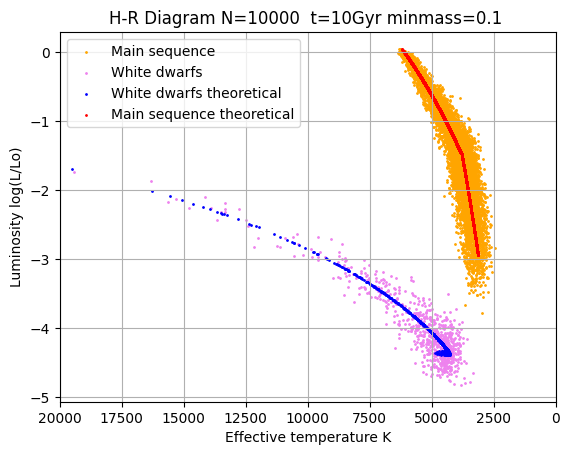

In [29]:
# Add errors
real_T_ms = T_ms + errorFunction(T_ms,-1)
real_T_wd = T_wd + errorFunction(T_wd,-1)


real_log_L_ms = np.log10(L_ms) + np.log10(L_ms**(-1*0.05*e_1[:len(L_ms)]*np.average(log_L_ms)**2))
real_log_L_wd = np.log10(L_wd) + np.log10(L_wd**(-1*0.05*e_1[:len(L_wd)]))


#Graph

fig, ax = plt.subplots()

ax.set_title(f'H-R Diagram N={N}  t={t_cluster}Gyr minmass={minM} ')
ax.set_ylabel("Luminosity log(L/Lo)")
ax.grid()

ax.set_xlabel("Effective temperature K")
ax.invert_xaxis()
ax.set_xlim(20000,0)



ax.scatter(real_T_ms , real_log_L_ms, s=1,color='orange', label="Main sequence")
ax.scatter(real_T_wd, real_log_L_wd,color='violet', s=1, label="White dwarfs")
ax.scatter(T_wd, log_L_wd, s=1, color='blue', label="White dwarfs theoretical")
ax.scatter(T_ms , log_L_ms, s=1, color='red', label="Main sequence theoretical")
ax.legend()
ax.plot()

np.savez('HRdiagram.npz', array1=T_wd, array2=T_ms, array3=log_L_wd, array4=log_L_ms)


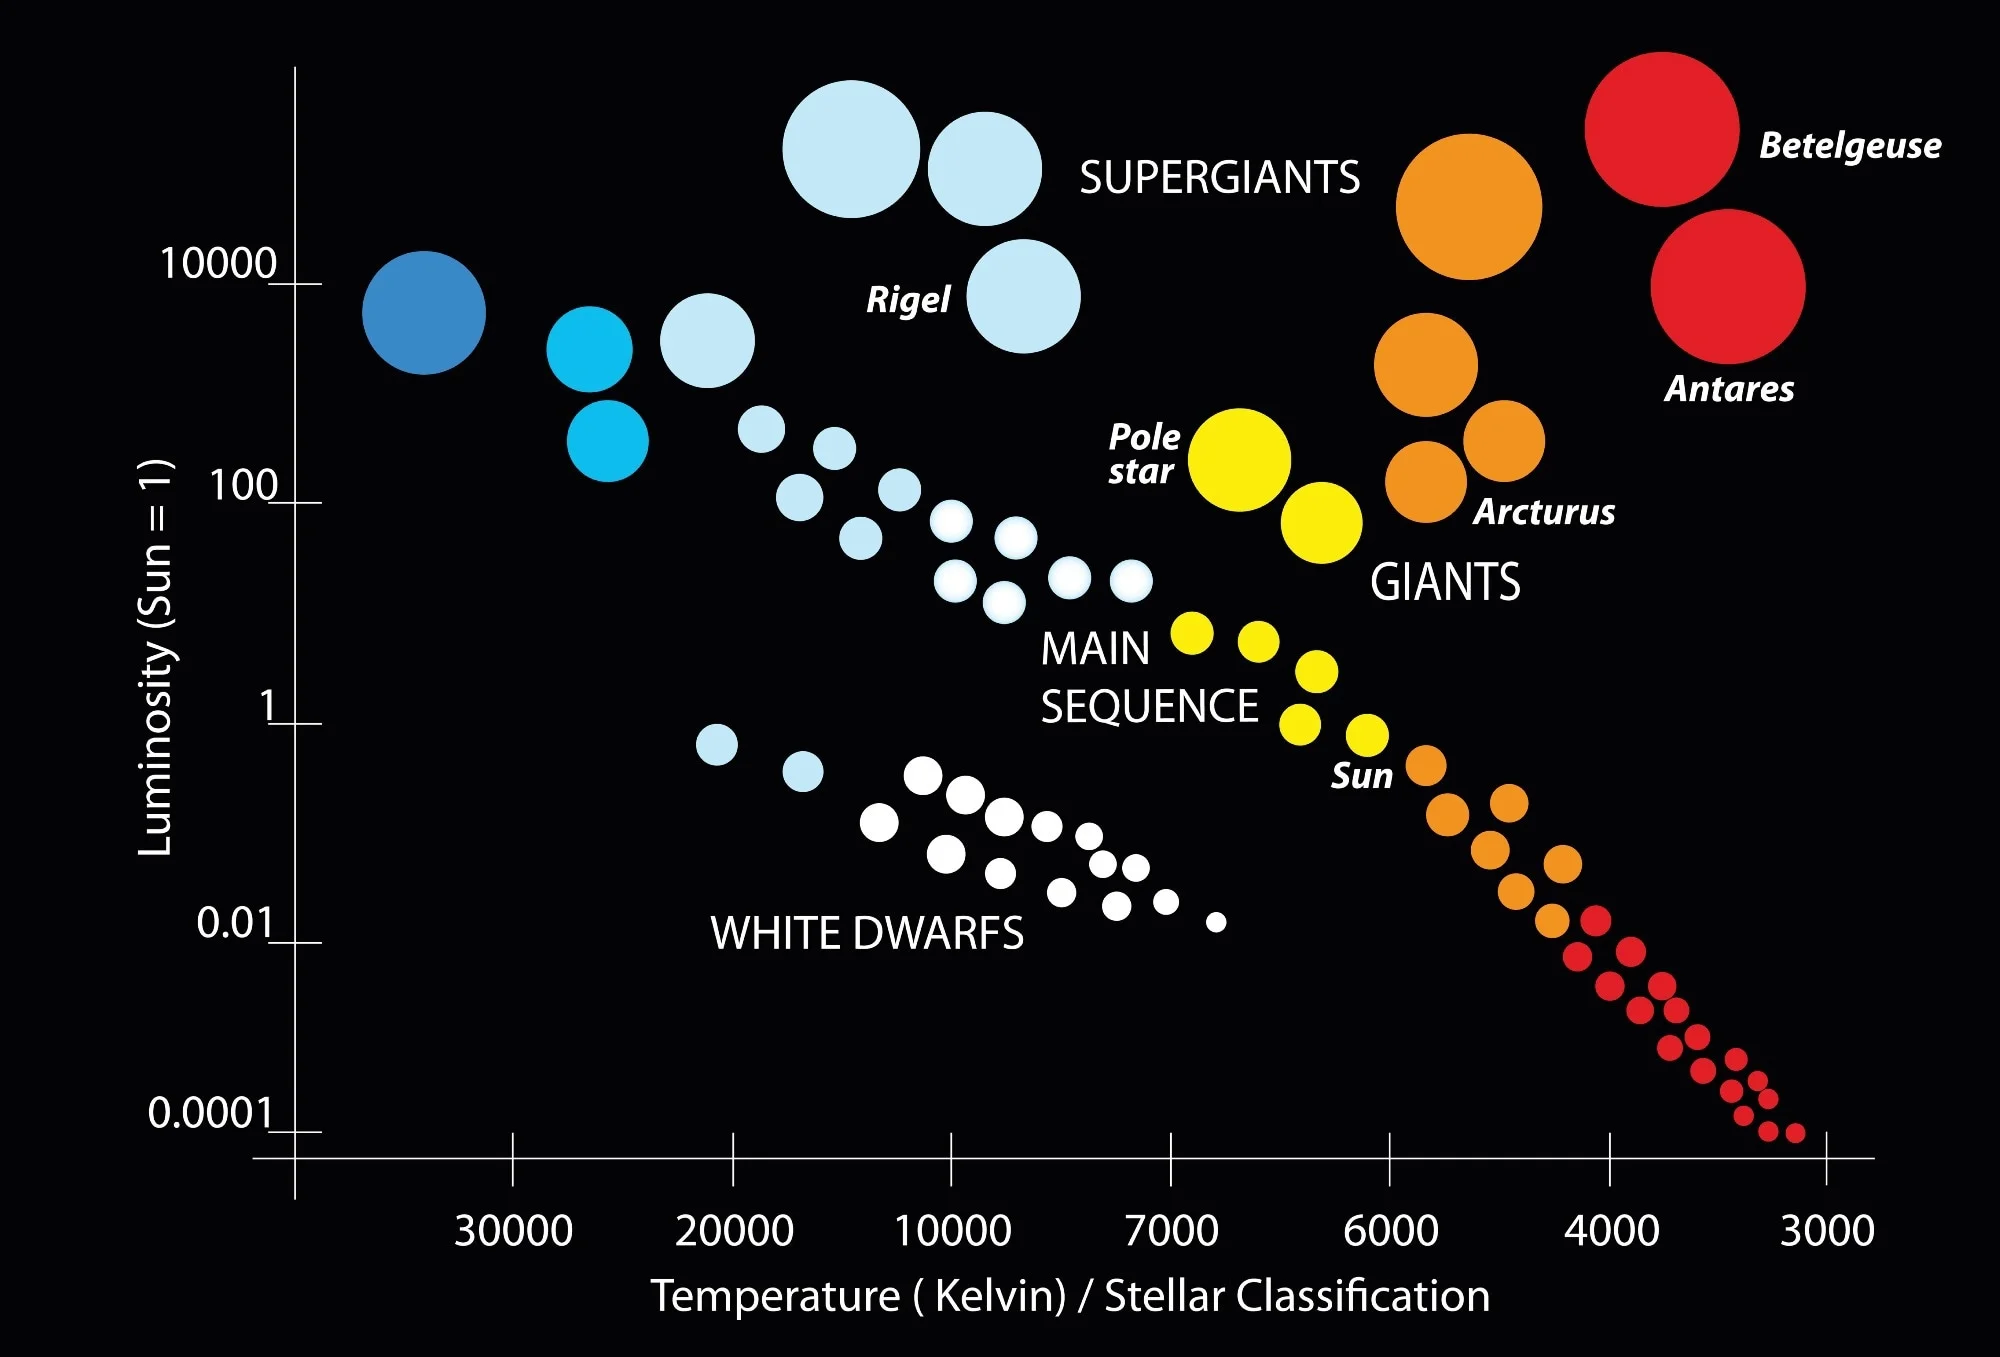

#### Luminosity function 

In [30]:
"""
L_total = np.concatenate((L_ms, L_wd))
plt.hist(L_wd, bins=100, range=(0,3e-2))
plt.title('Luminosity function white dwarfs')
plt.show()
plt.hist(L_ms, bins=100, range=(0,0.1))
plt.title('Luminosity function m-s stars')
plt.show()
plt.hist(L_total, bins=100, range=(0,0.05))
"""

"\nL_total = np.concatenate((L_ms, L_wd))\nplt.hist(L_wd, bins=100, range=(0,3e-2))\nplt.title('Luminosity function white dwarfs')\nplt.show()\nplt.hist(L_ms, bins=100, range=(0,0.1))\nplt.title('Luminosity function m-s stars')\nplt.show()\nplt.hist(L_total, bins=100, range=(0,0.05))\n"

### Addition of binary systems


In [31]:
#Total values
M_total =  np.concatenate((M_ms, M_wd))
L_total = np.concatenate((L_ms, L_wd))
T_total = np.concatenate((T_ms, L_wd))

per = 0.15
num_Bin = int(per*N) # Cuantos sistemas binarios quiero  

# values of binary systems
l_M_B = [] # lista de masa de binarias
l_L_B = [] # lista de luminosidad de binarias
l_T_B = [] # lista de temperatura de binarias




i=0
while i < num_Bin:  #Choose randomly 2 objects of the HR-diagram
    lL_ms = len(L_ms)
    lL_wd = len(L_wd)   

    star_1 , star_2 = np.random.randint(0, lL_ms + lL_wd, 2)


    # eliminar las estrellas que tomamos de las listas principales
    if star_1 < lL_ms - 1:

        L_star_1 = L_ms[star_1]
        L_ms = np.delete(L_ms, star_1 )
        T_star_1 = T_ms[star_1]
        T_ms = np.delete(T_ms, star_1 )
        
    else:

        L_star_1 = L_wd[star_1 - lL_ms ]
        L_wd = np.delete(L_wd, star_1 - lL_ms)
        T_star_1 = T_wd[star_1 - lL_ms]
        T_wd = np.delete(T_wd, star_1 - lL_ms)

    if star_2 < lL_ms - 1:

        L_star_2 = L_ms[star_2]
        L_ms = np.delete(L_ms, star_2)
        T_star_2 = T_ms[star_2]
        T_ms = np.delete(T_ms, star_2)
    else:

        L_star_2 = L_wd[star_2 - lL_ms]
        L_wd = np.delete(L_wd, star_2 - lL_ms)
        T_star_2 = T_wd[star_2 - lL_ms]
        T_wd = np.delete(T_wd, star_2 - lL_ms)

    # Add new B systems

    l_L_B.append(L_star_1 + L_star_2)
    l_T_B.append(np.max(( T_star_1, T_star_2 )))



    i+=1



L_bs = np.array(l_L_B)
T_bs = np.array(l_T_B)



"""
and build with them a new one, the binary system. The luminosity
of this binary system is just the sum of the luminosities of each single object: Lbin = L1 + L2 (be careful, it is the sum of luminosities, not the sum of log L. For the effective temperature just take
Teff,bin = max(Teff,1, Teff,2).
"""

'\nand build with them a new one, the binary system. The luminosity\nof this binary system is just the sum of the luminosities of each single object: Lbin = L1 + L2 (be careful, it is the sum of luminosities, not the sum of log L. For the effective temperature just take\nTeff,bin = max(Teff,1, Teff,2).\n'

[]

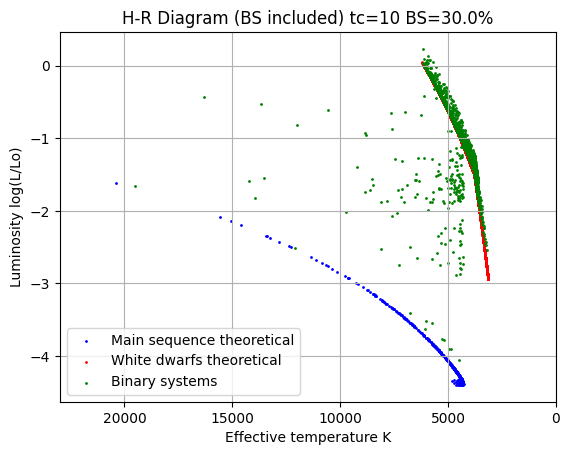

In [32]:
# Graficar con sistemas binarios 
fig, ax = plt.subplots()

ax.set_title(f'H-R Diagram (BS included) tc={t_cluster} BS={200*per}%')
ax.set_ylabel("Luminosity log(L/Lo)")
ax.grid()



ax.set_xlabel("Effective temperature K")
ax.invert_xaxis()
ax.set_xlim(23000 , 0)

log_L_ms = np.log10(L_ms)
log_L_wd = np.log10(L_wd)
log_L_bs = np.log10(L_bs)

#ax.scatter(real_T_ms , real_log_L_ms, s=1)
#ax.scatter(real_T_wd, real_log_L_wd, s=1)
ax.scatter(T_wd, log_L_wd, s=1, color='blue', label="Main sequence theoretical")
ax.scatter(T_ms , log_L_ms, s=1, color='red', label="White dwarfs theoretical")
ax.scatter(T_bs, log_L_bs, s=1, color='green', label="Binary systems")

plt.legend()

ax.plot()